# Spotify Music Popularity Capstone - Modeling

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
%matplotlib inline


import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from scipy import stats

from sklearn import linear_model, preprocessing, tree, svm, datasets, metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, r2_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import xgboost
from xgboost import XGBClassifier
import warnings
from subprocess import call
from IPython.display import Image
from datetime import datetime, timedelta, date
import os
import plotly.graph_objects as go
import itertools
from io import StringIO  
import pydotplus


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#
plt.rcParams['figure.figsize'] = (3, 3)
plt.style.use('seaborn-pastel')
plt.rcParams['figure.dpi'] = 150      
#
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
#
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#

In [3]:
# I believe the size of the dataset (~255K rows) is causing issues with the modeling.  Therefore I will reduce the size of the majority class

In [4]:
# load the data
X_train = pd.read_csv('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/X_train.csv', index_col =[0])
X_test = pd.read_csv('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/X_test.csv', index_col =[0])
y_train = pd.read_csv('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/y_train.csv', index_col =[0]) 
y_test = pd.read_csv('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/y_test.csv', index_col =[0])
y_test.head()

,Top100
233445,1
120671,1
68604,1
160156,0
52414,1


In [5]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

### Model selection
- test out a couple different ones (making sure to try different parameters within each algorithm as well), and select the best one by cross-validation
- if you have a huge dataset, then whichever classification algorithm you use might not matter so much in terms of classification performance (so choose your algorithm based on speed or ease of use instead).
#### QUESTION: when/how does speed become an important consideration?
- If your training set is small, high bias/low variance classifiers (e.g., Naive Bayes) have an advantage over low bias/high variance classifiers (e.g., kNN), since the latter will overfit. But low bias/high variance classifiers start to win out as your training set grows (they have lower asymptotic error), since high bias classifiers aren’t powerful enough to provide accurate models.



#### Algorithms we will try:
- Logistic Regression
- Random Forest
- Decision Tree
- XGBoost
- Naive Bayes
- K-Nearest Neighbor


### Logistic Regression

In [6]:
lr_clf = LogisticRegression(max_iter = 500, random_state = 123)
lr_clf.fit(X_train, y_train)
print(f'Accuracy on training data: {accuracy_score(lr_clf.predict(X_train), y_train):.3f}')
print(f'Accuracy on test data: {accuracy_score(lr_clf.predict(X_test), y_test):.3f}')

/Users/gregwelliver/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy on training data: 0.921
Accuracy on test data: 0.867


Let's also look at a Classification Report

In [7]:
print("Classification Report for Training Data")
print(classification_report(y_train, lr_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, lr_clf.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1485
           1       0.89      0.96      0.92      1495

    accuracy                           0.92      2980
   macro avg       0.92      0.92      0.92      2980
weighted avg       0.92      0.92      0.92      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       378
           1       0.83      0.91      0.87       368

    accuracy                           0.87       746
   macro avg       0.87      0.87      0.87       746
weighted avg       0.87      0.87      0.87       746



#### Let's also look at a confusion matrix

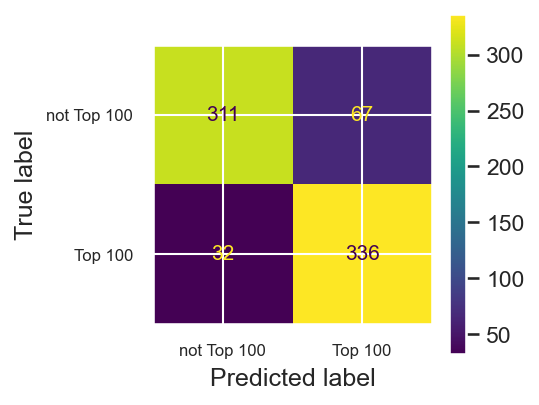

In [8]:
y_pred = lr_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels = lr_clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['not Top 100', 'Top 100'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['not Top 100', 'Top 100'], fontsize = 8)
ax.set_yticklabels(labels = ['not Top 100', 'Top 100'], fontsize = 8)
display_cm.plot(ax = ax);

#### Now find the optimal hyperparameters

#### Use GridSearchCV

In [ ]:
# using training data - commenting out because took forever to run
grid={"C": [0.001, 0.1, 1, 10, 100], "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver = 'newton-cg', max_iter = 500)
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

The above cell output: (it took forever to run, so want to avoid doing that again)

- tuned hpyerparameters :(best parameters)  {'C': 10, 'penalty': 'l2'}
- accuracy : 0.8734899328859059


In [ ]:
print("train accuracy:", logreg_cv.score(X_train, y_train))
print("test accuracy:", logreg_cv.score(X_test, y_test))

In [15]:
# now re-run with optimal hyperparameters
lr_clf = LogisticRegression(max_iter = 500, random_state = 123, C = 10, penalty='l2')
lr_clf.fit(X_train, y_train.values.ravel())

LogisticRegression(C=10, max_iter=500, random_state=123)

In [16]:
print("Classification Report for Training Data")
print(classification_report(y_train, lr_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, lr_clf.predict(X_test)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1485
           1       0.95      0.99      0.97      1495

    accuracy                           0.97      2980
   macro avg       0.97      0.97      0.97      2980
weighted avg       0.97      0.97      0.97      2980

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       378
           1       0.84      0.90      0.87       368

    accuracy                           0.87       746
   macro avg       0.87      0.87      0.87       746
weighted avg       0.87      0.87      0.87       746



### Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=300, random_state = 123, n_jobs=-1)
model_res = rf_clf.fit(X_train, y_train)
print('Accuracy on training set:',rf_clf.score(X_train,y_train))
print('Accuracy on test set:',rf_clf.score(X_test,y_test))
y_pred = model_res.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))


In [ ]:
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, rf_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, rf_clf.predict(X_test)))

In [ ]:
# look at confusion matrix
class_names=['0','1'] # name  of classes

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()


In [ ]:
# plot feature importances
feature_importance = rf_clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


#### QUESTIONS: 
- should i try someting here to optimize the number of estimators?
- should accuracy of training data be 1.0?
- in most of my calculations, accuracy and F1 score were either the same, or very close. is this expected?

### Decision Tree

In [ ]:
#Model 1: Entropy model - no max_depth
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)

# Call fit() on entr_model
entr_model.fit(X_train, y_train)

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred)

# Check out entr_model
entr_model

# Now we want to visualize the tree
dot_data = StringIO()

# We can do so with export_graphviz
tree.export_graphviz(entr_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 


# Alternatively for class_names use entr_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())
    

In [ ]:
#Model 1: Entropy model - no max_depth - interpretation and evaluation
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score:' , metrics.precision_score(y_test,y_pred))
print('Recall score:' , metrics.recall_score(y_test,y_pred))
# print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
# print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
# print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
# print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

In [ ]:
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, entr_model.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, entr_model.predict(X_test)))

In [ ]:
# Model 2: Gini impurity model - no max_depth
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)

# Call predict() on the gini_model as you did with the entr_model 
y_pred = gini_model.predict(X_test)

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred)

# Check out gini_model
gini_model

# As before, but make the model name gini_model
dot_data = StringIO()

tree.export_graphviz(gini_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 


# Alternatively for class_names use gini_model.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

In [ ]:
# Model 2: Gini impurity model - no max_depth - interpretation and evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
#print('Precision score:' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score:' , metrics.precision_score(y_test,y_pred))
#print('Recall score:' , metrics.recall_score(y_test,y_pred, pos_label = 0))
print('Recall score:' , metrics.recall_score(y_test,y_pred))

In [ ]:
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, gini_model.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, gini_model.predict(X_test)))

In [ ]:
# Model 3: Entropy model - max depth 3
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1234)
entr_model2.fit(X_train, y_train)
y_pred = entr_model2.predict(X_test)
y_pred = pd.Series(y_pred)
entr_model2
# As before, we need to visualize the tree to grasp its nature
dot_data = StringIO()

tree.export_graphviz(entr_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["0", "1"]) 

# Alternatively for class_names use entr_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
# Model 3: Entropy model - max depth 3 - interpretation and evaluation
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score:' , metrics.precision_score(y_test,y_pred))
print('Recall score:' , metrics.recall_score(y_test,y_pred))

In [ ]:
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, entr_model2.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, entr_model2.predict(X_test)))

In [ ]:
# Model 4: Gini impurity model - max depth 3
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion='gini', random_state = 1234, max_depth = 3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)
gini_model2

dot_data = StringIO()

tree.export_graphviz(gini_model2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["0", "1"]) 

# Alternatively for class_names use gini_model2.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [ ]:
# Model 4: Gini impurity model - max depth 3 - interpretation and evaluation
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score:' , metrics.precision_score(y_test,y_pred))
print('Recall score:' , metrics.recall_score(y_test,y_pred))

In [ ]:
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, gini_model2.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, gini_model2.predict(X_test)))

### XGBoost

In [ ]:
# xgboost
# get error: ValueError: feature_names must be string, and may not contain [, ] or <
xgb_clf= XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print(f'Accuracy on training data: {accuracy_score(xgb_clf.predict(X_train), y_train):.3f}')
print(f'Accuracy on test data: {accuracy_score(xgb_clf.predict(X_test), y_test):.3f}')

Let's look at a classification report

In [ ]:
print("Classification Report for Training Data")
print(classification_report(y_train, xgb_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, xgb_clf.predict(X_test)))

### Naive Bayes

In [ ]:
# Naive Bayes
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train)
print('Accuracy on training set:',nb_clf.score(X_train,y_train))
print('Accuracy on test set:',nb_clf.score(X_test,y_test))

In [ ]:
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, nb_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, nb_clf.predict(X_test)))

### KNN

In [ ]:
# KNN - note read that this tends not to work well on large datasets
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)  
knn_clf.fit(X_train, y_train.values.ravel())
print('Accuracy on training set:',knn_clf.score(X_train,y_train))
print('Accuracy on test set:',knn_clf.score(X_test,y_test))

In [ ]:
# test range of K values
test_scores = []
train_scores = []

for i in range(1,10):

    knn_clf = KNeighborsClassifier(i)
    knn_clf.fit(X_train,y_train.values.ravel())
    
    train_scores.append(knn_clf.score(X_train,y_train))
    test_scores.append(knn_clf.score(X_test,y_test))


In [ ]:
print(test_scores)
max(test_scores)

In [ ]:
print(train_scores)
max(train_scores)

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores,marker='*',label='Train Score')
p = sns.lineplot(test_scores,marker='o',label='Test Score')

Based on this plot, it would appear that the best number of neighbors is 5 (four in the chart above), since this is the maximum score on the Test set

In [ ]:
# create model with 5 neighbors
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train.values.ravel())
y_predict_test = knn_clf.predict(X_test)
y_predict_training = knn_clf.predict(X_train)

In [ ]:
# Using GridSearch to find optimal nearest neighbor
parameters = {"n_neighbors": range(1, 20)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train.values.ravel())
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [ ]:
gridsearch.best_params_

In [ ]:
# let's look at the confusion matrix
#y_pred = knn.predict(X_test)
y_pred = knn_clf.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
display_cm = ConfusionMatrixDisplay(pl, 
                                    display_labels = ['not Top 100', 'Top 100'])
display_cm.plot()


In [ ]:
# let's look at classification report
print("Classification Report for Training Data")
print(classification_report(y_train, knn_clf.predict(X_train)))
print("Classification Report for Test Data")
print(classification_report(y_test, knn_clf.predict(X_test)))

#### QUESTION
- is it unusual that some models would be showing overfitting, but others don't?
- is it different when we calculate the accuracy using .score method versus using y_predict?


### Metrics

https://docs.google.com/spreadsheets/d/1XeOVhqbcyKPQbFjLbLhdADAcCF-fXuSy2-01xcUH9Uw/edit#gid=0

#### write to CSV
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_csv(filepath)

#### write to parquet
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled_pq2.parquet')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
df.to_parquet(filepath, 
              engine = "pyarrow", 
              compression = None)

df = pd.read_parquet('/Users/gregwelliver/Desktop/springboard_files/Music-Popularity-Capstone-Repo/Data/df_data_scaled_pq.parquet')